In [33]:
import os
import datetime

import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [9]:
df = pd.read_csv('YTZ_departures_2019.csv')

In [10]:
# drop rows with only NaN
df.dropna(axis=1, how = 'all', inplace=True)

In [11]:
fl_df = df.copy()

In [12]:
#non_wxx = ('L01C','A01','A02','A03','A04','A05','A07','A08','A09','A10','A11', 'C01','C05','C07','C09','C10','E01','E02','M01', 'M02','M03', 'M08','M04','W02','W03','P14', 'P07', 'P11', 'P10', 'P06', 'P14', 'P07', 'P11')

In [13]:
#fl_df = fl_df[~fl_df['departureoveralldelaycode'].isin(non_wxx)]

In [14]:
wxx_df = pd.read_csv('WXX.csv')

In [15]:
# Define function to identify columns with missing values
def missing_vals(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [16]:
fl_df['actualflighttype'].value_counts()

SCHD      24330
SCHD X      810
GRDT        112
FERY         31
AIRT         30
DIVC         17
DIVH         11
TECH          4
TRAN          3
STBO          3
OVRF          1
CHAR          1
Name: actualflighttype, dtype: int64

### YOW WXX

In [17]:
yow_wxx2 = pd.read_csv('YOW_GCwxx.csv')

In [18]:
wxx_yow = pd.read_csv('YOW.csv')

wxx_yow = wxx_yow.drop(columns=['sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'maxtempC', 'mintempC'])

In [19]:
wxx_yow = wxx_yow.rename(columns={'date_time':'date_time', 'totalSnow_cm': 'Arr snowcm', 'DewPointC':'Arr DewPointC','WindGustKmph':'Arr WindGustKmph',
       'cloudcover':'Arr cloudcover', 'humidity':'Arr humidity', 'precipMM': 'Arr precipMM', 'pressure': 'Arr pressure', 'tempC':'Arr tempC',
        'visibility':'Arr visibility', 'winddirDegree':'Arr winddir', 'windspeedKmph':'Arr windspeedKmph', 'location':'location'})

In [20]:
wxx_yow['date_time'] = pd.to_datetime(wxx_yow['date_time'])
wxx_yow['date_time'] = wxx_yow['date_time'].dt.strftime('%Y-%m-%d %H:%M')
wxx_yow['date_time'] = wxx_yow['date_time'].astype(str)
wxx_yow['date_time'] = pd.to_datetime(wxx_yow.date_time)

In [21]:
yow_wxx2['date_time'] = pd.to_datetime(yow_wxx2['Date/Time'])
yow_wxx2['date_time'] = yow_wxx2['date_time'].dt.strftime('%Y-%m-%d %H:%M')
yow_wxx2['date_time'] = yow_wxx2['date_time'].astype(str)
yow_wxx2['date_time'] = pd.to_datetime(yow_wxx2.date_time)

yow_wxx2 = yow_wxx2[['date_time','Weather']]


In [22]:
wxx_yow_comb = wxx_yow.merge(yow_wxx2, how='left')

In [23]:
wxx_yow_comb['Weather'] = wxx_yow_comb['Weather'].fillna('Nothing')

In [24]:
wxx_yow_comb['Arr Snow'] = wxx_yow_comb['Weather'].str.contains('Snow')
wxx_yow_comb['Arr Rain'] = wxx_yow_comb['Weather'].str.contains ('Rain')
wxx_yow_comb['Arr Fog'] = wxx_yow_comb['Weather'].str.contains ('Fog')
wxx_yow_comb['Arr Moderate'] = wxx_yow_comb['Weather'].str.contains ('Moderate')
wxx_yow_comb['Arr FZ Rain'] = wxx_yow_comb['Weather'].str.contains ('Freezing Rain')
wxx_yow_comb['Arr Heavy'] = wxx_yow_comb['Weather'].str.contains('Heavy')
wxx_yow_comb['Arr TS'] = wxx_yow_comb['Weather'].str.contains ('Thunderstorms')
wxx_yow_comb['Arr Haze'] = wxx_yow_comb['Weather'].str.contains ('Haze')

In [25]:
wxx_yow_comb['Arr Snow'] = wxx_yow_comb['Arr Snow'].astype(int)
wxx_yow_comb['Arr Rain'] = wxx_yow_comb['Arr Rain'].astype(int)
wxx_yow_comb['Arr Fog'] =wxx_yow_comb['Arr Fog'].astype(int)
wxx_yow_comb['Arr Moderate'] = wxx_yow_comb['Arr Moderate'].astype(int)
wxx_yow_comb['Arr FZ Rain'] = wxx_yow_comb['Arr FZ Rain'].astype(int)
wxx_yow_comb['Arr Heavy'] = wxx_yow_comb['Arr Heavy'].astype(int)
wxx_yow_comb['Arr TS'] = wxx_yow_comb['Arr TS'].astype(int)
wxx_yow_comb['Arr Haze'] =wxx_yow_comb['Arr Haze'].astype(int)

In [26]:
wxx_yow_comb['Arr Temp Dew Spread'] = abs(wxx_yow_comb['Arr tempC']-wxx_yow_comb['Arr DewPointC'])

In [27]:
wxx_yow_comb

,date_time,Arr snowcm,Arr DewPointC,Arr WindGustKmph,Arr cloudcover,Arr humidity,Arr precipMM,Arr pressure,Arr tempC,Arr visibility,...,Weather,Arr Snow,Arr Rain,Arr Fog,Arr Moderate,Arr FZ Rain,Arr Heavy,Arr TS,Arr Haze,Arr Temp Dew Spread
0,2019-01-01 00:00:00,10.5,-4,30,100,82,2.2,1007,-9,4,...,"Freezing Rain,Fog",0,1,1,0,1,0,0,0,5
1,2019-01-01 01:00:00,10.5,-4,30,100,86,1.1,1006,-7,5,...,"Freezing Rain,Fog",0,1,1,0,1,0,0,0,3
2,2019-01-01 02:00:00,10.5,-5,29,100,91,2.0,1006,-6,6,...,"Freezing Rain,Fog",0,1,1,0,1,0,0,0,1
3,2019-01-01 03:00:00,10.5,-5,29,100,95,2.7,1006,-5,7,...,"Rain,Fog",0,1,1,0,0,0,0,0,0
4,2019-01-01 04:00:00,10.5,-5,29,100,95,1.3,1005,-5,6,...,"Freezing Rain,Fog",0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,2019-12-31 19:00:00,14.3,-1,14,98,97,0.1,998,0,3,...,Snow,1,0,0,0,0,0,0,0,1
9500,2019-12-31 20:00:00,14.3,-1,15,97,97,0.2,998,-1,3,...,Snow,1,0,0,0,0,0,0,0,0
9501,2019-12-31 21:00:00,14.3,-2,15,95,96,0.3,998,-1,2,...,Nothing,0,0,0,0,0,0,0,0,1
9502,2019-12-31 22:00:00,14.3,-3,17,92,94,0.2,998,-2,3,...,Snow,1,0,0,0,0,0,0,0,1


In [29]:
def calculate_abs_humidity(temperature, relative_humidity):
    t = temperature
    rh = relative_humidity
    abs_humidity = (6.112*math.exp((17.67*t)/(t+243.5)) * rh * 2.1674)/(273.15 + t)
    return abs_humidity

In [34]:
wxx_yow_comb['Arr Absolute Hum'] = np.vectorize(calculate_abs_humidity)(
   wxx_yow_comb['Arr tempC'],
   wxx_yow_comb['Arr humidity'])

In [36]:
wxx_yow_comb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Arr snowcm,9504.0,0.531566,1.912537,0.000000,0.000000,0.000000,0.000000,14.300000
Arr DewPointC,9504.0,0.940972,11.508270,-30.000000,-8.000000,2.000000,10.000000,26.000000
Arr WindGustKmph,9504.0,20.774095,9.441535,2.000000,14.000000,19.000000,27.000000,56.000000
Arr cloudcover,9504.0,54.843960,35.125765,0.000000,19.000000,59.000000,89.000000,100.000000
Arr humidity,9504.0,77.984007,12.647653,35.000000,69.000000,79.000000,89.000000,100.000000
Arr precipMM,9504.0,0.157797,0.496239,0.000000,0.000000,0.000000,0.100000,6.800000
Arr pressure,9504.0,1016.111953,8.690565,984.000000,1010.000000,1016.000000,1022.000000,1040.000000
Arr tempC,9504.0,4.391309,12.227549,-27.000000,-5.000000,5.000000,15.000000,31.000000
Arr visibility,9504.0,9.704861,3.910569,0.000000,8.000000,10.000000,10.000000,20.000000
Arr winddir,9504.0,210.427294,86.093832,4.000000,145.000000,228.000000,283.000000,358.000000


In [21]:
wxx_yow_comb['Arr windspeedKmph'] = wxx_yow_comb['Arr windspeedKmph']* 1000 / 3600
wxx_yow_comb['Arr WindGustKmph'] = wxx_yow_comb['Arr WindGustKmph']* 1000 / 3600

In [37]:
wv = wxx_yow_comb.pop('Arr windspeedKmph')
max_wv = wxx_yow_comb.pop('Arr WindGustKmph')

#convert to radians 
wd_rad = wxx_yow_comb.pop('Arr winddir')*np.pi / 180

#calculate the wind x and y components
wxx_yow_comb['Arr Wx'] = wv*np.cos(wd_rad)
wxx_yow_comb['Arr Wy'] = wv*np.sin(wd_rad)

#calculate the max wind x and y components
wxx_yow_comb['Arr Gust Wx'] = max_wv*np.cos(wd_rad)
wxx_yow_comb['Arr Gust Wy'] = max_wv*np.sin(wd_rad)

In [42]:
wxx_yow_comb.keys()

Index(['date_time', 'Arr snowcm', 'Arr DewPointC', 'Arr cloudcover',
       'Arr humidity', 'Arr precipMM', 'Arr pressure', 'Arr tempC',
       'Arr visibility', 'location', 'Weather', 'Arr Snow', 'Arr Rain',
       'Arr Fog', 'Arr Moderate', 'Arr FZ Rain', 'Arr Heavy', 'Arr TS',
       'Arr Haze', 'Arr Temp Dew Spread', 'Arr Absolute Hum', 'Arr Wx',
       'Arr Wy', 'Arr Gust Wx', 'Arr Gust Wy'],
      dtype='object')

In [41]:
arr_wxx = wxx_yow_comb.drop(['Weather','location', 'Arr Heavy'], axis =1)

In [40]:
arr_wxx

,date_time,Arr snowcm,Arr DewPointC,Arr cloudcover,Arr humidity,Arr precipMM,Arr pressure,Arr tempC,Arr visibility,Arr Snow,...,Arr FZ Rain,Arr Heavy,Arr TS,Arr Haze,Arr Temp Dew Spread,Arr Absolute Hum,Arr Wx,Arr Wy,Arr Gust Wx,Arr Gust Wy
0,2019-01-01 00:00:00,10.5,-4,100,82,2.2,1007,-9,4,0,...,1,0,0,0,5,2.087189,1.986041,18.895916,3.135854,29.835657
1,2019-01-01 01:00:00,10.5,-4,100,86,1.1,1006,-7,5,0,...,1,0,0,0,3,2.537216,3.824168,16.564291,6.748532,29.231102
2,2019-01-01 02:00:00,10.5,-5,100,91,2.0,1006,-6,6,0,...,1,0,0,0,1,2.887617,5.130302,14.095389,9.918584,27.251086
3,2019-01-01 03:00:00,10.5,-5,100,95,2.7,1006,-5,7,0,...,0,0,0,0,0,3.240321,5.901876,11.583085,13.165724,25.839189
4,2019-01-01 04:00:00,10.5,-5,100,95,1.3,1005,-5,6,0,...,1,0,0,0,0,3.240321,1.584301,12.903100,3.534211,28.783838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,2019-12-31 19:00:00,14.3,-1,98,97,0.1,998,0,3,1,...,0,0,0,0,1,4.704278,-8.651355,-2.480736,-13.457664,-3.858923
9500,2019-12-31 20:00:00,14.3,-1,97,97,0.2,998,-1,3,1,...,0,0,0,0,0,4.389757,-7.548035,-4.901751,-12.580059,-8.169586
9501,2019-12-31 21:00:00,14.3,-2,95,96,0.3,998,-1,2,0,...,0,0,0,0,1,4.344502,-6.293204,-7.771460,-9.439806,-11.657189
9502,2019-12-31 22:00:00,14.3,-3,92,94,0.2,998,-2,3,1,...,0,0,0,0,1,3.967236,-6.691306,-7.431448,-11.375220,-12.633462


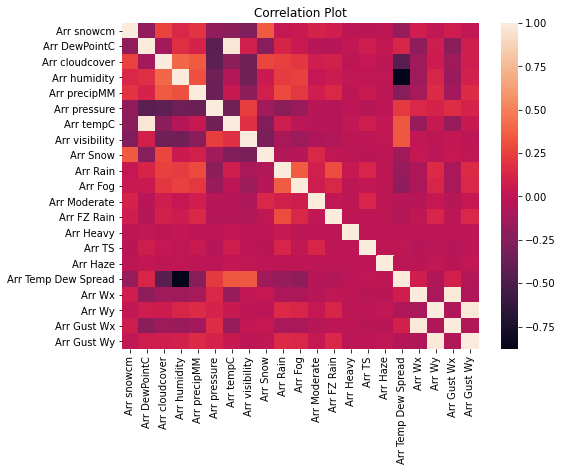

In [26]:
df_corr = arr_wxx.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

### YTZ WXX

In [27]:
wxx_2 = pd.read_csv('WXX.csv')

In [28]:
wxx_ytz = pd.read_csv('YTZ.csv')
wxx_ytz = wxx_ytz.drop(columns=['sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset',  'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'maxtempC', 'mintempC'])

In [29]:
wxx_ytz = wxx_ytz.rename(columns={'date_time':'date_time', 'totalSnow_cm': 'Dep snowcm', 'DewPointC':'Dep DewPointC','WindGustKmph':'Dep WindGustKmph',
       'cloudcover':'Dep cloudcover', 'humidity':'Dep humidity', 'precipMM': 'Dep precipMM', 'pressure': 'Dep pressure', 'tempC':'Dep tempC',
        'visibility':'Dep visibility', 'winddirDegree':'Dep winddir', 'windspeedKmph':'Dep windspeedKmph', 'location':'location'})

In [30]:
wxx_2['Weather'] = wxx_2['Weather'].fillna('Nothing')

In [31]:
wxx_ytz['date_time'] = pd.to_datetime(wxx_ytz['date_time'])
wxx_ytz['date_time'] = wxx_ytz['date_time'].dt.strftime('%Y-%m-%d %H:%M')
wxx_ytz['date_time'] = wxx_ytz['date_time'].astype(str)
wxx_ytz['date_time'] = pd.to_datetime(wxx_ytz.date_time)

In [32]:
wxx_2['date_time'] = pd.to_datetime(wxx_2['Date/Time'])
wxx_2['date_time'] = wxx_2['date_time'].dt.strftime('%Y-%m-%d %H:%M')
wxx_2['date_time'] = wxx_2['date_time'].astype(str)
wxx_2['date_time'] = pd.to_datetime(wxx_2.date_time)

wxx_2 = wxx_2[['date_time','Weather']]
wxx_2['date_time'] = pd.to_datetime(wxx_2.date_time)

In [33]:
wxx_2['Dep Snow'] = wxx_2['Weather'].str.contains('Snow')
wxx_2['Dep Rain'] = wxx_2['Weather'].str.contains ('Rain')
wxx_2['Dep Fog'] = wxx_2['Weather'].str.contains ('Fog')
wxx_2['Dep Moderate'] = wxx_2['Weather'].str.contains ('Moderate')
wxx_2['Dep FZ Rain'] = wxx_2['Weather'].str.contains ('Freezing Rain')
wxx_2['Dep Heavy'] = wxx_2['Weather'].str.contains('Heavy')
wxx_2['Dep TS'] = wxx_2['Weather'].str.contains ('Thunderstorms')
wxx_2['Dep Haze'] = wxx_2['Weather'].str.contains ('Haze')
wxx_2['Dep Drizzle'] = wxx_2['Weather'].str.contains ('Drizzle')
wxx_2['Dep Ice'] = wxx_2['Weather'].str.contains ('Ice')

In [34]:
wxx_2['Dep Snow'] = wxx_2['Dep Rain'].astype(int)
wxx_2['Dep Rain'] = wxx_2['Dep Rain'].astype(int)
wxx_2['Dep Fog'] = wxx_2['Dep Fog'].astype(int)
wxx_2['Dep Moderate'] = wxx_2['Dep Moderate'].astype(int)
wxx_2['Dep FZ Rain'] = wxx_2['Dep FZ Rain'].astype(int)
wxx_2['Dep Heavy'] = wxx_2['Dep Heavy'].astype(int)
wxx_2['Dep TS'] = wxx_2['Dep TS'].astype(int)
wxx_2['Dep Haze'] = wxx_2['Dep Haze'].astype(int)
wxx_2['Dep Drizzle'] = wxx_2['Dep Drizzle'].astype(int)
wxx_2['Dep Ice'] = wxx_2['Dep Ice'].astype(int)

In [35]:
wxx_2 = wxx_2.drop('Weather', axis =1)

In [36]:
dep_wxx = wxx_ytz.merge(wxx_2, how='left')

In [37]:
dep_wxx.keys()

Index(['date_time', 'Dep snowcm', 'Dep DewPointC', 'Dep WindGustKmph',
       'Dep cloudcover', 'Dep humidity', 'Dep precipMM', 'Dep pressure',
       'Dep tempC', 'Dep visibility', 'Dep winddir', 'Dep windspeedKmph',
       'location', 'Dep Snow', 'Dep Rain', 'Dep Fog', 'Dep Moderate',
       'Dep FZ Rain', 'Dep Heavy', 'Dep TS', 'Dep Haze', 'Dep Drizzle',
       'Dep Ice'],
      dtype='object')

In [38]:
dep_wxx['Temp Dew Spread'] = abs(dep_wxx['Dep tempC']-dep_wxx['Dep DewPointC'])

In [39]:
dep_wxx.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dep snowcm,8760.0,0.136986,0.657619,0.0,0.0,0.0,0.0,6.4
Dep DewPointC,8760.0,3.714041,10.007513,-25.0,-4.0,5.0,12.0,24.0
Dep WindGustKmph,8760.0,21.707306,10.887574,2.0,13.0,20.0,29.0,63.0
Dep cloudcover,8760.0,52.340297,34.053504,0.0,20.0,54.0,84.0,100.0
Dep humidity,8760.0,68.687443,13.245563,23.0,59.0,69.0,79.0,99.0
Dep precipMM,8760.0,0.099224,0.335207,0.0,0.0,0.0,0.0,5.3
Dep pressure,8760.0,1016.307534,8.009210,991.0,1011.0,1016.0,1022.0,1042.0
Dep tempC,8760.0,9.153881,11.285411,-22.0,0.0,10.0,19.0,32.0
Dep visibility,8760.0,10.146119,3.305211,0.0,10.0,10.0,10.0,20.0
Dep winddir,8760.0,206.189954,92.602317,0.0,114.0,230.0,280.0,359.0


In [40]:
dep_wxx['Dep windspeedKmph'] = dep_wxx['Dep windspeedKmph']* 1000 / 3600
dep_wxx['Dep WindGustKmph'] = dep_wxx['Dep WindGustKmph']* 1000 / 3600

In [41]:
wv = dep_wxx.pop('Dep windspeedKmph')
max_wv = dep_wxx.pop('Dep WindGustKmph')

#convert to radians 
wd_rad = dep_wxx.pop('Dep winddir')*np.pi / 180

#calculate the wind x and y components
dep_wxx['Dep Wx'] = wv*np.cos(wd_rad)
dep_wxx['Dep Wy'] = wv*np.sin(wd_rad)

#calculate the max wind x and y components
dep_wxx['Dep Gust Wx'] = max_wv*np.cos(wd_rad)
dep_wxx['Dep Gust Wy'] = max_wv*np.sin(wd_rad)

In [42]:
dep_wxx.keys()

Index(['date_time', 'Dep snowcm', 'Dep DewPointC', 'Dep cloudcover',
       'Dep humidity', 'Dep precipMM', 'Dep pressure', 'Dep tempC',
       'Dep visibility', 'location', 'Dep Snow', 'Dep Rain', 'Dep Fog',
       'Dep Moderate', 'Dep FZ Rain', 'Dep Heavy', 'Dep TS', 'Dep Haze',
       'Dep Drizzle', 'Dep Ice', 'Temp Dew Spread', 'Dep Wx', 'Dep Wy',
       'Dep Gust Wx', 'Dep Gust Wy'],
      dtype='object')

(-8.505094044013687, 9.627606223876377, -12.775831660331667, 11.21586607597237)

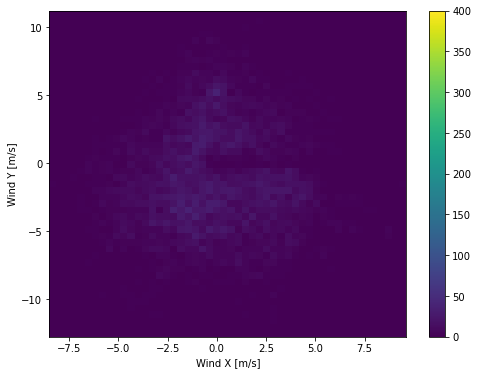

In [43]:
plt.hist2d(dep_wxx['Dep Wx'], dep_wxx['Dep Wy'], bins = (50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

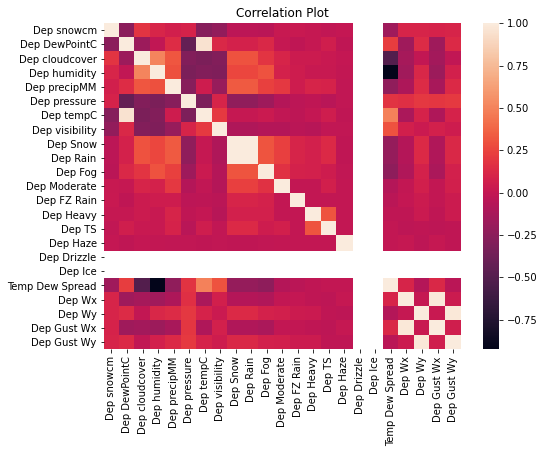

In [44]:
df_corr = dep_wxx.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [45]:
dep_wxx = dep_wxx.drop(['location'], axis =1)

### Combine wxx and flights

In [46]:
all_wxx = dep_wxx.merge(arr_wxx, how='left')

In [47]:
flights = fl_df[fl_df['actualflighttype'] == 'SCHD']

In [48]:
df3 = fl_df.groupby('flightdate').agg('count').reset_index()
df3['Tot Daily Flt'] = df3['flightnumber']
df1 = df3[['Tot Daily Flt', 'flightdate']]

In [49]:
all_ytz = fl_df[fl_df['actualflighttype'].str.contains('SCHD')]
all_ytz = all_ytz.merge(df1, how='left')

In [50]:
all_ytz['DLY'] = all_ytz['departureoveralldelaytime']> 10
all_ytz['DLY'] = all_ytz['DLY'].astype(int)

In [51]:
all_ytz = all_ytz[all_ytz['departurevsscheduled']>-1]

In [52]:
all_ytz['CXL'] = all_ytz['actualflighttype']=='SCHD X'
all_ytz['CXL'] = all_ytz['CXL'].astype(int)

In [53]:
all_ytz['Impacted'] = all_ytz['CXL']+ all_ytz['DLY']

In [54]:
all_ytz = all_ytz[['flightnumber', 'flightdate', 'departurestation',
         'arrivalstation', 'citypair', 'Tot Daily Flt',  'sdt', 'sat', 'departurevsscheduled', 
         'departureoveralldelaytime', 'Impacted','DLY', 'CXL']]

In [55]:
all_ytz  = all_ytz.sort_values(by = 'sdt')
all_ytz['date_time'] = all_ytz['sdt'].astype(str).str[0:-2] + ('00:00')
all_ytz['date_time'] = pd.to_datetime(all_ytz['date_time'])
all_ytz['date_time'] = all_ytz['date_time'].dt.strftime('%Y-%m-%d %H:%M')
all_ytz['date_time'] = all_ytz['date_time'].astype(str)
all_ytz['date_time'] = pd.to_datetime(all_ytz.date_time)
all_ytz = all_ytz.merge(dep_wxx, how='left')

In [56]:
all_ytz = all_ytz[all_ytz['departureoveralldelaytime']<=5]
all_ytz0=all_ytz0.copy()
all_ytz0['IROP'] = 0
all_ytz0.shape
all_ytz1 = all_ytz[all_ytz['departureoveralldelaytime']>5] 
all_ytz1 = all_ytz1[all_ytz1['departureoveralldelaytime']<=30]
all_ytz1=all_ytz1.copy()
all_ytz1['IROP'] = 1
all_ytz1.shape
all_ytz2 = all_ytz[all_ytz['departureoveralldelaytime']>30] 
all_ytz2 = [all_ytz2, cxl]
dlycxl = pd.concat(irop2)
dlycxl=dlycxl.copy()
dlycxl['IROP'] = 2
dlycxl.shape
frames = [sched0, sched1, dlycxl]
sched = pd.concat(frames)

NameError: name 'all_ytz0' is not defined

In [36]:
all_ytz = all_ytz.drop(columns=['sdt', 'sat','date_time'])
all_ytz["departurevsscheduled"] = all_ytz["departurevsscheduled"].fillna(0)
all_ytz_wxx = all_ytz.to_csv('all_ytz_wxx.csv', index = False)

In [41]:
all_ytz.keys()

Index(['flightnumber', 'flightdate', 'departurestation',
       'departurestationregular', 'arrivalstation', 'arrivalstationregular',
       'citypair', 'citypairregular', 'citypairordered',
       'citypairregularordered',
       ...
       'Dep Heavy', 'Dep TS', 'Dep Haze', 'Dep Drizzle', 'Dep Ice',
       'Temp Dew Spread', 'Dep Wx', 'Dep Wy', 'Dep Gust Wx', 'Dep Gust Wy'],
      dtype='object', length=112)

#### Uncontrollable

In [48]:
fl_df['control'] = fl_df['departureoveralldelaycode'].str.contains('C')

In [49]:
yow_fl= fl_df[fl_df['citypair']== 'YTZYOW']
yow_uc = yow_fl[yow_fl['control']==False]

In [603]:
sched_uc = yow_uc[yow_uc['actualflighttype'].str.contains('SCHD')]

In [604]:
sched_uc = sched_uc.merge(df1, how='left')
sched_uc = sched_uc.copy()

In [605]:
sched_uc['DLY'] = sched_uc['departureoveralldelaytime']> 10
sched_uc['DLY'] = sched_uc['DLY'].astype(int)

In [606]:
sched_uc['CXL'] = sched_uc['actualflighttype']=='SCHD X'
sched_uc['CXL'] = sched_uc['CXL'].astype(int)

In [607]:
sched_uc['Impacted'] = sched_uc['CXL']+ sched_uc['DLY']

In [609]:
sched_uc = sched_uc[['flightdate', 'Tot Daily Flt',  'sdt', 'sat',  
         'departureoveralldelaytime', 'Impacted','DLY', 'CXL',  ]]

In [610]:
sched_uc  = sched_uc.sort_values(by = 'sdt')
sched_uc['date_time'] = sched_uc['sdt'].astype(str).str[0:-2] + ('00:00')
sched_uc['date_time'] = pd.to_datetime(sched_uc['date_time'])
sched_uc['date_time'] = sched_uc['date_time'].dt.strftime('%Y-%m-%d %H:%M')
sched_uc['date_time'] = sched_uc['date_time'].astype(str)
sched_uc['date_time'] = pd.to_datetime(sched_uc.date_time)

In [611]:
sched_uc['Sched departure'] = pd.to_datetime(sched_uc['sdt'])
sched_uc['Sched arrival'] = pd.to_datetime(sched_uc['sat'])
uc_wxx = sched_uc.merge(all_wxx, how='left')
uc_wxx = uc_wxx.drop(columns=['sdt', 'sat','date_time'])

In [612]:
uc_wxx.to_csv('uc_wxx.csv', index = False)

In [613]:
uc_wxx

,flightdate,Tot Daily Flt,departureoveralldelaytime,Impacted,DLY,CXL,Sched departure,Sched arrival,Dep snowcm,Dep DewPointC,...,Arr Moderate,Arr FZ Rain,Arr Heavy,Arr TS,Arr Haze,Arr Temp Dew Spread,Arr Wx,Arr Wy,Arr Gust Wx,Arr Gust Wy
0,1/1/2019,66,29,1,1,0,2019-01-01 10:30:00,2019-01-01 11:29:00,0.0,-2,...,0,0,0,0,0,2,4.043012,-3.392490,8.724395,-7.320637
1,1/1/2019,66,15,1,1,0,2019-01-01 11:30:00,2019-01-01 12:29:00,0.0,-2,...,0,0,0,0,0,2,4.335011,-3.903262,8.257165,-7.434785
2,1/1/2019,66,25,1,1,0,2019-01-01 12:50:00,2019-01-01 13:49:00,0.0,-2,...,0,0,0,0,0,2,4.595782,-4.438095,7.992664,-7.718426
3,1/1/2019,66,4,0,0,0,2019-01-01 18:55:00,2019-01-01 19:54:00,0.0,-9,...,0,0,0,0,0,3,4.245134,-4.395965,5.402898,-5.594865
4,1/10/2019,74,7,0,0,0,2019-01-10 11:35:00,2019-01-10 12:34:00,0.0,-10,...,0,0,0,0,0,3,6.476216,-5.244337,9.282577,-7.516882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,9/8/2019,76,4,0,0,0,2019-09-08 14:50:00,2019-09-08 15:49:00,0.0,8,...,0,0,0,0,0,6,1.695314,-3.188422,2.086540,-3.924212
1968,9/8/2019,76,11,1,1,0,2019-09-08 21:00:00,2019-09-08 21:59:00,0.0,6,...,0,0,0,0,0,7,2.088206,-0.760045,4.176412,-1.520090
1969,9/9/2019,77,13,1,1,0,2019-09-09 20:55:00,2019-09-09 21:54:00,0.0,10,...,0,0,0,0,0,9,0.145260,1.660324,0.290519,3.320649
1970,9/9/2019,77,0,0,0,0,2019-09-09 07:45:00,2019-09-09 08:44:00,0.0,7,...,0,0,0,0,0,3,1.929951,0.236968,3.584194,0.440084


#### Consider cancellations and delays for YTZ-YOW

In [50]:
sched_yow = fl_df[fl_df['citypair']== 'YTZYOW']

In [52]:
sched_flt = sched_yow[sched_yow['actualflighttype']=='SCHD']

In [53]:
sched_yow = sched_yow.copy()

In [54]:
cxl = sched_yow[sched_yow['actualflighttype']== 'SCHD X']

In [55]:
sched_flt = sched_flt[sched_flt['departurevsscheduled']>-1]

In [56]:
sched0 = sched_flt[sched_flt['departureoveralldelaytime']<=5]
sched0=sched0.copy()
sched0['IROP'] = 0
sched0.shape

(972, 92)

In [57]:
sched1 = sched_flt[sched_flt['departureoveralldelaytime']>5] 
sched1 = sched1[sched1['departureoveralldelaytime']<=30]
sched1=sched1.copy()
sched1['IROP'] = 1
sched1.shape

(1275, 92)

In [58]:
sched2 = sched_flt[sched_flt['departureoveralldelaytime']>30] 
irop2 = [sched2, cxl]
dlycxl = pd.concat(irop2)

In [59]:
dlycxl=dlycxl.copy()
dlycxl['IROP'] = 2
dlycxl.shape

(712, 92)

In [60]:
frames = [sched0, sched1, dlycxl]
sched = pd.concat(frames)

In [61]:
sched['IROP'].value_counts()

1    1275
0     972
2     712
Name: IROP, dtype: int64

In [62]:
#gender = {'M ':1, 'F ':3}
#df_cust.Gender = [gender[item] for item in df_cust.Gender]


In [63]:
sched = sched.merge(df1, how='left')

In [64]:
sched = sched[[ 'Tot Daily Flt',  'sdt', 'sat',
         'departureoveralldelaytime','IROP']]

In [65]:
sched  = sched.sort_values(by = 'sdt')
sched['date_time'] = sched['sdt'].astype(str).str[0:-2] + ('00:00')
sched['date_time'] = pd.to_datetime(sched['date_time'])
sched['date_time'] = sched['date_time'].dt.strftime('%Y-%m-%d %H:%M')
sched['date_time'] = sched['date_time'].astype(str)
sched['date_time'] = pd.to_datetime(sched.date_time)

In [66]:
sched['Sched departure'] = pd.to_datetime(sched['sdt'])
sched['Sched arrival'] = pd.to_datetime(sched['sat'])
sched_wxx = sched.merge(all_wxx, how='left')


In [67]:
sched = sched.drop(columns=['sdt', 'sat','date_time'])
irop_wxx2 = sched_wxx.to_csv('irop_wxx.csv', index = False)

In [812]:

sched["departurevsscheduled"] = sched["departurevsscheduled"].fillna(0)

In [815]:
sched

,flightnumber,flightdate,departurestation,departurestationregular,arrivalstation,arrivalstationregular,citypair,citypairregular,citypairordered,citypairregularordered,...,charterflightflag,ferryflightflag,registrationnumber,tailnumber,uncorrectedtailnumber,actualflighttype,operated_flight_forfuel,control,IROP,Tot Daily Flt
0,211,1/9/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQG,806,806.00000,SCHD,1,NaN,0,64
1,229,1/9/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQL,810,810.00000,SCHD,1,False,0,64
2,245,1/1/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQP,814,814.00000,SCHD,1,False,0,66
3,267,1/8/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQO,813,813.00000,SCHD,1,True,0,64
4,269,1/9/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQJ,808,808.00000,SCHD,1,True,0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,249,12/1/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,KQA,821,-43604.62153,SCHD X,0,NaN,2,73
2955,221,12/1/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQD,803,-43619.62153,SCHD X,0,NaN,2,73
2956,259,9/30/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQY,819,-43621.69792,SCHD X,0,NaN,2,78
2957,255,12/1/2019,YTZ,YTZ,YOW,YOW,YTZYOW,YTZYOW,YOWYTZ,YOWYTZ,...,0,0,LQX,818,-43621.49306,SCHD X,0,NaN,2,73


In [697]:
#sched['Impacted'] = sum(sched['CXL']+ sched['DLY'])

In [699]:
#impact = sched_wxx[sched_wxx['Impacted']==1]

#noimpact= sched_wxx[sched_wxx['Impacted']!=1]

In [487]:
#sched = sched[sched['departurevsscheduled']>= 0]

In [488]:
sched['Impacted'].value_counts()

0    1413
1    1355
Name: Impacted, dtype: int64

In [489]:
sched = sched[['flightnumber', 'flightdate', 'departurestation',
         'arrivalstation', 'citypair', 'Tot Daily Flt',  'sdt', 'sat', 'departurevsscheduled', 
         'departureoveralldelaytime', 'Impacted','DLY', 'CXL', 'Early' ]]

In [490]:
sched = sched.drop(columns=['flightnumber', 'departurestation', 'arrivalstation',
       'citypair', 'departurevsscheduled', ])
sched  = sched.sort_values(by = 'sdt')
sched['date_time'] = sched['sdt'].astype(str).str[0:-2] + ('00:00')
sched['date_time'] = pd.to_datetime(sched['date_time'])
sched['date_time'] = sched['date_time'].dt.strftime('%Y-%m-%d %H:%M')
sched['date_time'] = sched['date_time'].astype(str)
sched['date_time'] = pd.to_datetime(sched.date_time)

In [491]:
sched['Sched departure'] = pd.to_datetime(sched['sdt'])
sched['Sched arrival'] = pd.to_datetime(sched['sat'])


In [492]:
sched_wxx = sched.merge(all_wxx, how='left')
sched = sched.drop(columns=['sdt', 'sat','date_time'])

In [494]:
dec1 = sched_wxx.to_csv('sched_wxx.csv', index = False)

In [499]:
dec1

,flightdate,Tot Daily Flt,sdt,sat,departureoveralldelaytime,Impacted,DLY,CXL,Early,date_time,...,Arr Moderate,Arr FZ Rain,Arr Heavy,Arr TS,Arr Haze,Arr Temp Dew Spread,Arr Wx,Arr Wy,Arr Gust Wx,Arr Gust Wy
692,12/1/2019,73,12/1/19 17:15,12/1/19 18:14,93,1,1,0,0,2019-12-01 17:00:00,...,0,0,0,0,0,2,1.272060,6.544181,1.749082,8.998249
693,12/1/2019,73,12/1/19 18:50,12/1/19 19:49,75,1,1,0,0,2019-12-01 18:00:00,...,0,0,0,0,0,0,1.545612,6.199112,2.217617,8.894377
694,12/1/2019,73,12/1/19 19:55,12/1/19 20:54,126,1,1,0,0,2019-12-01 19:00:00,...,0,0,0,0,0,3,1.761016,6.141394,2.526676,8.811566
695,12/1/2019,73,12/1/19 21:55,12/1/19 22:54,3,0,0,0,0,2019-12-01 21:00:00,...,0,0,0,0,0,6,2.090123,5.742566,3.040179,8.352823


In [498]:
dec1 = sched_wxx[sched_wxx['flightdate']=='12/1/2019']

In [430]:
sched_wxx.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
departureoveralldelaytime,2954.0,17.707854,22.182148,0.000000,3.000000,10.000000,24.000000,320.000000
Impacted,2954.0,0.481720,0.499750,0.000000,0.000000,0.000000,1.000000,1.000000
DLY,2954.0,0.481720,0.499750,0.000000,0.000000,0.000000,1.000000,1.000000
CXL,2954.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Early,2954.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dep snowcm,2954.0,0.162559,0.734602,0.000000,0.000000,0.000000,0.000000,6.400000
Dep DewPointC,2954.0,3.483751,10.225956,-24.000000,-4.000000,5.000000,12.000000,24.000000
Dep cloudcover,2954.0,55.544347,34.173214,0.000000,23.000000,59.000000,89.000000,100.000000
Dep humidity,2954.0,66.911307,13.697901,27.000000,57.000000,67.000000,77.000000,98.000000
Dep precipMM,2954.0,0.093331,0.299994,0.000000,0.000000,0.000000,0.000000,4.100000


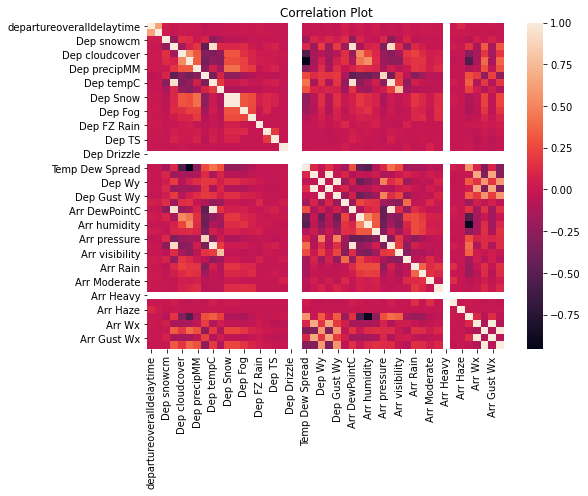

In [199]:
df_corr = sched_wxx.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [267]:
flights = flights[['flightnumber', 'flightdate', 'departurestation',
         'arrivalstation', 'citypair',  'sdt', 'sat', 'departurevsscheduled', 
         'departureoveralldelaytime',  ]]

In [268]:
ytz_yow = flights[flights['citypair']== 'YTZYOW']
ytz_yow = ytz_yow.merge(df1, how='left')

In [269]:
ytz_yow = ytz_yow.drop(columns=['flightnumber', 'departurestation', 'arrivalstation',
       'citypair', 'departurevsscheduled', ])
ytz_yow = ytz_yow.sort_values(by = 'sdt')
ytz_yow['date_time'] = ytz_yow['sdt'].astype(str).str[0:-2] + ('00:00')
ytz_yow['date_time'] = pd.to_datetime(ytz_yow['date_time'])
ytz_yow['date_time'] = ytz_yow['date_time'].dt.strftime('%Y-%m-%d %H:%M')
ytz_yow['date_time'] = ytz_yow['date_time'].astype(str)
ytz_yow['date_time'] = pd.to_datetime(ytz_yow.date_time)

In [270]:
ytz_dep = flights.sort_values(by = 'sdt')
ytz_dep['date_time'] = ytz_dep['sdt'].astype(str).str[0:-2] + ('00:00')
ytz_dep['date_time'] = pd.to_datetime(ytz_dep['date_time'])
ytz_dep['date_time'] = ytz_dep['date_time'].dt.strftime('%Y-%m-%d %H:%M')
ytz_dep['date_time'] = ytz_dep['date_time'].astype(str)
ytz_dep['date_time'] = pd.to_datetime(ytz_dep.date_time)

In [271]:
flt_wxx = ytz_yow.merge(all_wxx, how='left')

#### All YTZ-YOW flights

In [324]:
all_flt_wxx.keys()

Index(['flightdate', 'departureoveralldelaytime', 'Tot Daily Flt',
       'Dep snowcm', 'Dep DewPointC', 'Dep cloudcover', 'Dep humidity',
       'Dep precipMM', 'Dep pressure', 'Dep tempC', 'Dep visibility',
       'Dep Snow', 'Dep Rain', 'Dep Fog', 'Dep Moderate', 'Dep FZ Rain',
       'Dep Heavy', 'Dep TS', 'Dep Haze', 'Dep Drizzle', 'Dep Ice',
       'Temp Dew Spread', 'Dep Wx', 'Dep Wy', 'Dep Gust Wx', 'Dep Gust Wy',
       'Arr snowcm', 'Arr DewPointC', 'Arr cloudcover', 'Arr humidity',
       'Arr precipMM', 'Arr pressure', 'Arr tempC', 'Arr visibility',
       'Arr Snow', 'Arr Rain', 'Arr Fog', 'Arr Moderate', 'Arr FZ Rain',
       'Arr Heavy', 'Arr TS', 'Arr Haze', 'Arr Temp Dew Spread', 'Arr Wx',
       'Arr Wy', 'Arr Gust Wx', 'Arr Gust Wy', 'Sched departure',
       'Sched arrival'],
      dtype='object')

In [334]:
all_flt_wxx = flt_wxx.copy()

In [335]:
all_flt_wxx['Sched departure'] = pd.to_datetime(all_flt_wxx['sdt'])
all_flt_wxx['Sched arrival'] = pd.to_datetime(all_flt_wxx['sat'])
all_flt_wxx = all_flt_wxx.drop(columns=['sdt', 'sat','date_time'])

In [336]:
all_flt_wxx['flightdate'] = pd.to_datetime(all_flt_wxx['flightdate'])

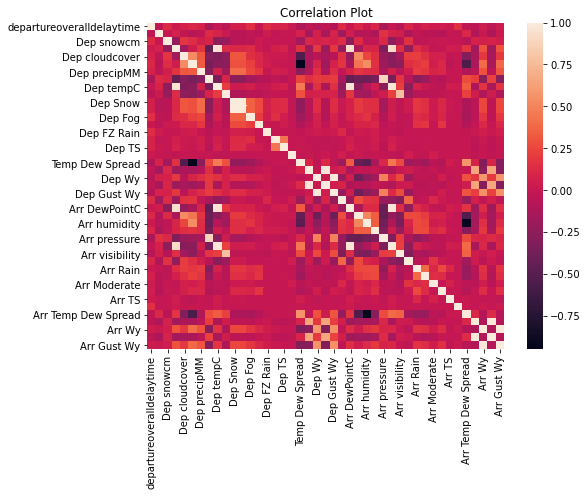

In [338]:
df_corr = all_flt_wxx.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [337]:
all_flt_wxx = all_flt_wxx.drop(['Dep Drizzle', 'Arr Heavy', 'Dep Ice'], axis =1)

In [329]:
data = all_flt_wxx['departureoveralldelaytime']

Skewness: 5.418502
Kurtosis: 51.529413


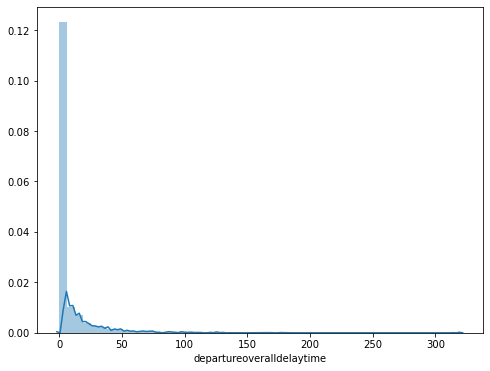

In [331]:
sns.distplot(data)

#skewness and kurtosis
print('Skewness: %f' % data.skew())
print('Kurtosis: %f' % data.kurt())

In [339]:
all_flt_wxx.to_csv('all_flt_wxx.csv', index = False)

In [ ]:
delays= sns.lmplot(x='departureoveralldelaytime', y='dep_delay', hue= 'Weather accounts for 50% or more of delay', data=sort_wxx_dep)
axes = delays.axes.flatten()
axes[0].set_title("MDW vs ORD")

plt.show()

#### Delayed YTZ-YOW flights

In [278]:
from datetime import time

In [305]:
dly1_wxx = flt_wxx[flt_wxx['departureoveralldelaytime']>0]

In [310]:
dly_wxx = dly1_wxx.copy()

In [312]:
dly_wxx['Sched departure'] = pd.to_datetime(dly_wxx['sdt'])
dly_wxx['Sched arrival'] = pd.to_datetime(dly_wxx['sat'])
dly_wxx = dly_wxx.drop(columns=['sdt', 'sat','date_time'])

In [295]:
dly_wxx = dly_wxx.drop(columns=['sdt', 'sat','Sched dep date', 'Sched arr date' ])
dly_wxx['flightdate'] = pd.to_datetime(dly_wxx['flightdate'])

In [314]:
dly_wxx.keys()

Index(['flightdate', 'departureoveralldelaytime', 'Tot Daily Flt',
       'Dep snowcm', 'Dep DewPointC', 'Dep cloudcover', 'Dep humidity',
       'Dep precipMM', 'Dep pressure', 'Dep tempC', 'Dep visibility',
       'Dep Snow', 'Dep Rain', 'Dep Fog', 'Dep Moderate', 'Dep FZ Rain',
       'Dep Heavy', 'Dep TS', 'Dep Haze', 'Dep Drizzle', 'Dep Ice',
       'Temp Dew Spread', 'Dep Wx', 'Dep Wy', 'Dep Gust Wx', 'Dep Gust Wy',
       'Arr snowcm', 'Arr DewPointC', 'Arr cloudcover', 'Arr humidity',
       'Arr precipMM', 'Arr pressure', 'Arr tempC', 'Arr visibility',
       'Arr Snow', 'Arr Rain', 'Arr Fog', 'Arr Moderate', 'Arr FZ Rain',
       'Arr Heavy', 'Arr TS', 'Arr Haze', 'Arr Temp Dew Spread', 'Arr Wx',
       'Arr Wy', 'Arr Gust Wx', 'Arr Gust Wy', 'Sched departure',
       'Sched arrival'],
      dtype='object')

In [316]:
dly_wxx = dly_wxx[['flightdate', 'Sched departure',
       'Sched arrival','departureoveralldelaytime', 'Tot Daily Flt',
       'Dep snowcm', 'Dep DewPointC', 'Dep cloudcover', 'Dep humidity',
       'Dep precipMM', 'Dep pressure', 'Dep tempC', 'Dep visibility',
       'Dep Snow', 'Dep Rain', 'Dep Fog', 'Dep Moderate', 'Dep FZ Rain',
       'Dep Heavy', 'Dep TS', 'Dep Haze', 'Dep Drizzle', 'Dep Ice',
       'Temp Dew Spread', 'Dep Wx', 'Dep Wy', 'Dep Gust Wx', 'Dep Gust Wy',
       'Arr snowcm', 'Arr DewPointC', 'Arr cloudcover', 'Arr humidity',
       'Arr precipMM', 'Arr pressure', 'Arr tempC', 'Arr visibility',
       'Arr Snow', 'Arr Rain', 'Arr Fog', 'Arr Moderate', 'Arr FZ Rain',
       'Arr Heavy', 'Arr TS', 'Arr Haze', 'Arr Temp Dew Spread', 'Arr Wx',
       'Arr Wy', 'Arr Gust Wx', 'Arr Gust Wy',]]

In [318]:
dly_wxx

,flightdate,Sched departure,Sched arrival,departureoveralldelaytime,Tot Daily Flt,Dep snowcm,Dep DewPointC,Dep cloudcover,Dep humidity,Dep precipMM,...,Arr Moderate,Arr FZ Rain,Arr Heavy,Arr TS,Arr Haze,Arr Temp Dew Spread,Arr Wx,Arr Wy,Arr Gust Wx,Arr Gust Wy
0,1/1/2019,2019-01-01 10:30:00,2019-01-01 11:29:00,29,43,0.0,-2,60,82,0.0,...,0,0,0,0,0,2,4.043012,-3.392490,8.724395,-7.320637
1,1/1/2019,2019-01-01 11:30:00,2019-01-01 12:29:00,15,43,0.0,-2,60,81,0.0,...,0,0,0,0,0,2,4.335011,-3.903262,8.257165,-7.434785
2,1/1/2019,2019-01-01 12:50:00,2019-01-01 13:49:00,25,43,0.0,-2,60,80,0.0,...,0,0,0,0,0,2,4.595782,-4.438095,7.992664,-7.718426
3,1/1/2019,2019-01-01 14:30:00,2019-01-01 15:29:00,19,43,0.0,-5,33,73,0.0,...,0,0,0,0,0,1,4.063076,-3.788880,7.313537,-6.819984
4,1/1/2019,2019-01-01 18:55:00,2019-01-01 19:54:00,4,43,0.0,-9,11,67,0.0,...,0,0,0,0,0,3,4.245134,-4.395965,5.402898,-5.594865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,9/30/2019,2019-09-30 17:00:00,2019-09-30 17:59:00,3,58,0.0,12,37,65,0.0,...,0,0,0,0,0,7,-0.750792,3.532200,-1.039558,4.890738
4120,9/4/2019,2019-09-04 08:30:00,2019-09-04 09:29:00,8,54,0.0,13,54,71,0.0,...,0,0,0,0,0,2,-4.179271,-5.546080,-6.854004,-9.095571
4148,9/6/2019,2019-09-06 20:55:00,2019-09-06 21:54:00,11,64,0.0,12,54,63,0.0,...,0,0,0,0,0,1,2.191856,4.493970,3.409553,6.990620
4154,9/7/2019,2019-09-07 12:05:00,2019-09-07 13:04:00,3,36,0.0,12,86,63,0.0,...,0,0,0,0,0,2,1.471998,-2.355689,2.060797,-3.297965


In [ ]:
df_corr = dly_wxx.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [ ]:
dly_wxx.to_csv('dly_wxx.csv', index = False)

In [ ]:
df_corr = df_dly.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [ ]:
cols = ['departureoveralldelaytime',
        'totalSnow_cm',
        'cloudcover',
        'humidity',
        'precipMM',
        'pressure',
       'visibility']

In [ ]:
#import package
from sklearn.ensemble import IsolationForest

#Set plot configuration
fig, axs = plt.subplots(2, 3, figsize = (22, 12), facecolor = 'w', edgecolor = 'k')
axs = axs.ravel()

#Iterate through specified columns and isolate outliers(points outside a specified anomoly score)
for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df_dly[column].values.reshape(-1,1))

    xx = np.linspace(df_dly[column].min(), df_dly[column].max(), len(df_dly)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                       where = outlier ==-1, color='#C58BE7',
                       alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [ ]:
df_corr = dly_yow.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [ ]:
df_corr = df_dly.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [ ]:
df_full.keys()

In [284]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name = 'Column', value_name = 'Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data = df_std)
_ = ax.set_xticklabels(df.keys(), rotation = 90)

NameError: name 'train_mean' is not defined

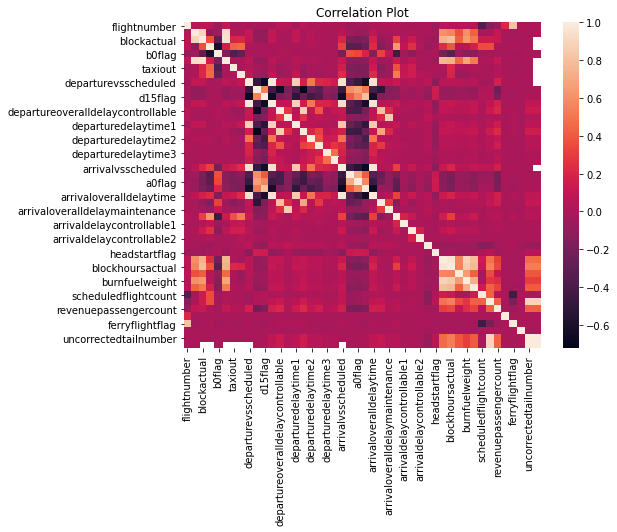

In [285]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

In [286]:
df_corr = df_dly.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()

NameError: name 'df_dly' is not defined

In [ ]:
df_plt = sns.lmplot(x='precipMM', y='departureoveralldelaytime', hue= 'location', data=df_dly)
axes = df_plt.axes.flatten()
axes[0].set_title("MDW vs ORD in snow")

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.dtypes

In [ ]:
df = df.drop(columns=['flightnumber', 'departurestation', 'arrivalstation', 'citypair', 'departurevsscheduled' ])

In [ ]:
df

In [ ]:
df_ytz_wxx = wxx_ytz.merge(wxx_2, how='left')

In [ ]:
df_ytz_wxx

In [287]:
df_ytz_wxx['Weather'].value_counts()

NameError: name 'df_ytz_wxx' is not defined

In [288]:
df_ytz_wxx = pd.DataFrame(df_ytz_wxx['Weather'].str.split(', ',1).tolist(),
                                 columns = ['flips','row'])

NameError: name 'df_ytz_wxx' is not defined

In [289]:
df_ytz_wxx

NameError: name 'df_ytz_wxx' is not defined

In [ ]:
df_corr = df_ytz_wxx.corr()
sns.heatmap(df_corr)
plt.title('Correlation Plot')
plt.show()